In [1]:
#Installing all necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip insta11 statsmodels
!pip install geopandas
!pip install descartes
!pip install folium
!pip install vaderSentiment
!pip install twython
!pip install langdetect

ERROR: unknown command "insta11" - maybe you meant "install"


In [2]:
#Importing the libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import statsmodels.api as smf
import statsmodels.formula.api as sm
import statsmodels.api as smf
import matplotlib.pylab as plt
import math
import urllib
import csv
import requests
import folium
from folium import plugins
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Specifying links of lisitngs and price
airbnb_dec_2018 = ['http://data.insideairbnb.com/united-states/ny/new-york-city/2018-12-06/data/listings.csv.gz', 
                    'http://data.insideairbnb.com/united-states/ny/new-york-city/2018-12-06/data/calendar.csv.gz',
                    'http://data.insideairbnb.com/united-states/ny/new-york-city/2018-12-06/data/reviews.csv.gz']

In [4]:
#loading listings and prices datasets for 2018
df1 = pd.read_csv(airbnb_dec_2018[0], compression='gzip', header=0, sep=',', quotechar='"')
df2 = pd.read_csv(airbnb_dec_2018[1], compression='gzip', header=0, sep=',', quotechar='"')

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Visualising datasets
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,21456,https://www.airbnb.com/rooms/21456,20181206022948,2018-12-06,Light-filled classic Central Park,"An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...","An adorable, classic, clean, light-filled one-...",none,"Diverse. Great coffee shops and restaurants, n...",...,f,NaN,NaN,f,f,moderate,t,t,1,0.72
2,2539,https://www.airbnb.com/rooms/2539,20181206022948,2018-12-06,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181206022948,2018-12-06,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.37
4,21644,https://www.airbnb.com/rooms/21644,20181206022948,2018-12-06,"Upper Manhattan, New York",A great space in a beautiful neighborhood- min...,Nice room in a spacious pre-war apartment in u...,A great space in a beautiful neighborhood- min...,none,I love that the neighborhood is safe to walk a...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.51


In [6]:
df2.head()

,listing_id,date,available,price
0,2515,2019-12-02,t,$89.00
1,21456,2019-12-05,t,$148.00
2,21456,2019-12-04,t,$148.00
3,21456,2019-12-03,t,$148.00
4,21456,2019-12-02,t,$148.00


In [7]:
#Importing libraries for converting coordinates into taxi zones and loading shapefile with taxizones
import bokeh, bokeh.plotting, bokeh.models
from bokeh.io import output_notebook, show
output_notebook()

import geopandas as gpd
from shapely.geometry import Point
import urllib
import dask.dataframe as dd
import dask.distributed
import numpy as np

import sklearn.preprocessing

client = dask.distributed.Client()

coord_system = {'init': 'epsg:4326'}
df = gpd.read_file('CaseUrbanPopulation_data/taxi_zones/taxi_zones.shp').to_crs(coord_system)
df = df.drop(['Shape_Area', 'Shape_Leng', 'OBJECTID'], axis=1)
df.head()

Loading BokehJS ...

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


,zone,LocationID,borough,geometry
0,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [8]:
#Creating a geo-dataframe
geo_df = df1[['id','name','neighbourhood','neighbourhood_cleansed','street','neighbourhood_group_cleansed','latitude','longitude','zipcode','price']]
geo_df.head()

,id,name,neighbourhood,neighbourhood_cleansed,street,neighbourhood_group_cleansed,latitude,longitude,zipcode,price
0,2515,Stay at Chez Chic budget room #1,Harlem,Harlem,"New York, NY, United States",Manhattan,40.799205,-73.953676,10026,$59.00
1,21456,Light-filled classic Central Park,Upper West Side,Upper West Side,"New York, NY, United States",Manhattan,40.797642,-73.961775,10025,$140.00
2,2539,Clean & quiet apt home by the park,Kensington,Kensington,"Brooklyn , NY, United States",Brooklyn,40.647486,-73.972370,11218,$149.00
3,2595,Skylit Midtown Castle,Midtown,Midtown,"New York, NY, United States",Manhattan,40.753621,-73.983774,10018,$225.00
4,21644,"Upper Manhattan, New York",Hamilton Heights,Harlem,"New York, NY, United States",Manhattan,40.828028,-73.947308,10031,$89.00


In [9]:
#conveting latitude-longitude into geometry
geo_df = gpd.GeoDataFrame(
    geo_df, geometry=gpd.points_from_xy(geo_df.longitude, geo_df.latitude))
geo_df.head()

,id,name,neighbourhood,neighbourhood_cleansed,street,neighbourhood_group_cleansed,latitude,longitude,zipcode,price,geometry
0,2515,Stay at Chez Chic budget room #1,Harlem,Harlem,"New York, NY, United States",Manhattan,40.799205,-73.953676,10026,$59.00,POINT (-73.95368 40.79920)
1,21456,Light-filled classic Central Park,Upper West Side,Upper West Side,"New York, NY, United States",Manhattan,40.797642,-73.961775,10025,$140.00,POINT (-73.96177 40.79764)
2,2539,Clean & quiet apt home by the park,Kensington,Kensington,"Brooklyn , NY, United States",Brooklyn,40.647486,-73.972370,11218,$149.00,POINT (-73.97237 40.64749)
3,2595,Skylit Midtown Castle,Midtown,Midtown,"New York, NY, United States",Manhattan,40.753621,-73.983774,10018,$225.00,POINT (-73.98377 40.75362)
4,21644,"Upper Manhattan, New York",Hamilton Heights,Harlem,"New York, NY, United States",Manhattan,40.828028,-73.947308,10031,$89.00,POINT (-73.94731 40.82803)


In [10]:
#Replacing characters with blank in price and zipcode columns
geo_df['price'] = geo_df['price'].astype(str).str.replace('\D+', '0')
geo_df['zipcode'] = geo_df['zipcode'].astype(str).str.replace('\D+', '0')

#Converting price column to int
geo_df['price'] = geo_df['price'].astype(str).astype('int64')


geo_df.head()

,id,name,neighbourhood,neighbourhood_cleansed,street,neighbourhood_group_cleansed,latitude,longitude,zipcode,price,geometry
0,2515,Stay at Chez Chic budget room #1,Harlem,Harlem,"New York, NY, United States",Manhattan,40.799205,-73.953676,10026,59000,POINT (-73.95368 40.79920)
1,21456,Light-filled classic Central Park,Upper West Side,Upper West Side,"New York, NY, United States",Manhattan,40.797642,-73.961775,10025,140000,POINT (-73.96177 40.79764)
2,2539,Clean & quiet apt home by the park,Kensington,Kensington,"Brooklyn , NY, United States",Brooklyn,40.647486,-73.972370,11218,149000,POINT (-73.97237 40.64749)
3,2595,Skylit Midtown Castle,Midtown,Midtown,"New York, NY, United States",Manhattan,40.753621,-73.983774,10018,225000,POINT (-73.98377 40.75362)
4,21644,"Upper Manhattan, New York",Hamilton Heights,Harlem,"New York, NY, United States",Manhattan,40.828028,-73.947308,10031,89000,POINT (-73.94731 40.82803)


In [11]:
#Dividing the price column by 1000 due to error conversion of values after decimal points
geo_df['price'] = geo_df['price']/1000

In [12]:
#Checking datatypes of the DF
geo_df.dtypes

id                                 int64
name                              object
neighbourhood                     object
neighbourhood_cleansed            object
street                            object
neighbourhood_group_cleansed      object
latitude                         float64
longitude                        float64
zipcode                           object
price                            float64
geometry                        geometry
dtype: object

In [13]:
#Converting the datatypes
geo_df = geo_df.astype({"name": str, "neighbourhood": str,"neighbourhood_cleansed":str, 
                        "neighbourhood_group_cleansed":str, "street":str, "zipcode":float, "price":float})

In [14]:
#Saving file as csv so that dask package can be applied
geo_df.to_csv('geo_df.csv')

In [15]:
#converting file to dask dataframe
geo_dask = dd.read_csv('geo_df.csv')

In [16]:
#function for converting point to taxi zones
def assign_taxi_zones(df, lon_var, lat_var, locid_var):
    """Joins DataFrame with Taxi Zones shapefile.
    This function takes longitude values provided by `lon_var`, and latitude
    values provided by `lat_var` in DataFrame `df`, and performs a spatial join
    with the NYC taxi_zones shapefile. 
    The shapefile is hard coded in, as this function makes a hard assumption of
    latitude and longitude coordinates. It also assumes latitude=0 and 
    longitude=0 is not a datapoint that can exist in your dataset. Which is 
    reasonable for a dataset of New York, but bad for a global dataset.
    Only rows where `df.lon_var`, `df.lat_var` are reasonably near New York,
    and `df.locid_var` is set to np.nan are updated. 
    Parameters
    ----------
    df : pandas.DataFrame or dask.DataFrame
        DataFrame containing latitudes, longitudes, and location_id columns.
    lon_var : string
        Name of column in `df` containing longitude values. Invalid values 
        should be np.nan.
    lat_var : string
        Name of column in `df` containing latitude values. Invalid values 
        should be np.nan
    locid_var : string
        Name of series to return. 
    """

    import geopandas
    from shapely.geometry import Point


    # make a copy since we will modify lats and lons
    localdf = df[[lon_var, lat_var]].copy()
    
    # missing lat lon info is indicated by nan. Fill with zero
    # which is outside New York shapefile. 
    localdf[lon_var] = localdf[lon_var].fillna(value=0.)
    localdf[lat_var] = localdf[lat_var].fillna(value=0.)
    

    shape_df = geopandas.read_file('CaseUrbanPopulation_data/taxi_zones/taxi_zones.shp')
    shape_df.drop(['OBJECTID', "Shape_Area", "Shape_Leng", "borough", "zone"],
                  axis=1, inplace=True)
    shape_df = shape_df.to_crs({'init': 'epsg:4326'})

    try:
        local_gdf = geopandas.GeoDataFrame(
            localdf, crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in
                      zip(localdf[lon_var], localdf[lat_var])])

        local_gdf = geopandas.sjoin(
            local_gdf, shape_df, how='left', op='within')

        return local_gdf.LocationID.rename(locid_var)
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = localdf[lon_var]
        series = np.nan
        return series

In [17]:
#creating a taxizone column
geo_dask['taxizone_id'] = geo_dask.map_partitions(
    assign_taxi_zones, "longitude", "latitude",
    "taxizone_id", meta=('taxizone_id', np.float64))

In [18]:
#Creating a Pandas DF from Dask DF
dask_to_pd = geo_dask.compute()

In [19]:
dask_to_pd.head()

,Unnamed: 0,id,name,neighbourhood,neighbourhood_cleansed,street,neighbourhood_group_cleansed,latitude,longitude,zipcode,price,geometry,taxizone_id
0,0,2515,Stay at Chez Chic budget room #1,Harlem,Harlem,"New York, NY, United States",Manhattan,40.799205,-73.953676,10026.0,59.0,POINT (-73.95367574543542 40.79920479936168),41.0
1,1,21456,Light-filled classic Central Park,Upper West Side,Upper West Side,"New York, NY, United States",Manhattan,40.797642,-73.961775,10025.0,140.0,POINT (-73.96177484377306 40.79764221122139),151.0
2,2,2539,Clean & quiet apt home by the park,Kensington,Kensington,"Brooklyn , NY, United States",Brooklyn,40.647486,-73.972370,11218.0,149.0,POINT (-73.97236954007957 40.64748608166989),257.0
3,3,2595,Skylit Midtown Castle,Midtown,Midtown,"New York, NY, United States",Manhattan,40.753621,-73.983774,10018.0,225.0,POINT (-73.98377381114605 40.75362072657246),164.0
4,4,21644,"Upper Manhattan, New York",Hamilton Heights,Harlem,"New York, NY, United States",Manhattan,40.828028,-73.947308,10031.0,89.0,POINT (-73.9473084684745 40.82802807160385),116.0


In [20]:
#converting PD Df into GPD df
geo_df_new = gpd.GeoDataFrame(dask_to_pd)

In [21]:
#Processing the prices df
df2['price'] = df2['price'].astype(str).str.replace('\D+', '0')
df2.dropna()
df2['price'] = df2['price'].astype(str).astype('int64')
df2.dtypes

listing_id     int64
date          object
available     object
price          int64
dtype: object

In [22]:
#Visualising the DF
df2.head()

,listing_id,date,available,price
0,2515,2019-12-02,t,89000
1,21456,2019-12-05,t,148000
2,21456,2019-12-04,t,148000
3,21456,2019-12-03,t,148000
4,21456,2019-12-02,t,148000


In [23]:
#Dividing the price column by 1000 due to error conversion of values after decimal points
df2['price'] = df2['price']/1000
df2.head()

,listing_id,date,available,price
0,2515,2019-12-02,t,89.0
1,21456,2019-12-05,t,148.0
2,21456,2019-12-04,t,148.0
3,21456,2019-12-03,t,148.0
4,21456,2019-12-02,t,148.0


In [24]:
#Converting column to datetime
df2['date'] =  pd.to_datetime(df2['date'])

In [25]:
#Filtering dataset only for the holiday period
df2_hols = df2[(df2['date'] >= np.datetime64('2018-12-11')) & (df2['date'] <= np.datetime64('2018-12-31'))]
df2_hols.head(100)

,listing_id,date,available,price
398,27541347,2018-12-31,f,0.0
399,27541347,2018-12-30,f,0.0
400,27541347,2018-12-29,f,0.0
401,27541347,2018-12-28,f,0.0
402,27541347,2018-12-27,f,0.0
...,...,...,...,...
2101,21456,2018-12-20,t,150.0
2102,21456,2018-12-19,t,150.0
2103,21456,2018-12-18,f,0.0
2104,21456,2018-12-17,f,0.0


In [26]:
#Filtering dataset to contain only available = true values
df2_hols = df2_hols[(df2_hols['available'] == 't')]
df2_hols.head()

,listing_id,date,available,price
406,27541347,2018-12-23,t,200.0
407,27541347,2018-12-22,t,200.0
408,27541347,2018-12-21,t,200.0
409,27541347,2018-12-20,t,200.0
410,27541347,2018-12-19,t,200.0


In [27]:
#Grouping all the prices as per listing ID with mean
df2_hols = df2_hols.groupby(['listing_id']).mean()
df2_hols.head()

,price
listing_id,
2515,89.000000
2539,192.047619
2595,218.000000
3330,70.000000
3647,150.000000


In [28]:
#merging geo_df and holiday prices datasets
geo_df = pd.merge(geo_df_new,df2_hols,right_on= df2_hols.index,left_on=geo_df_new['id'],how='inner', suffixes=('','_hols'))
geo_df.head()

,key_0,Unnamed: 0,id,name,neighbourhood,neighbourhood_cleansed,street,neighbourhood_group_cleansed,latitude,longitude,zipcode,price,geometry,taxizone_id,price_hols
0,2515,0,2515,Stay at Chez Chic budget room #1,Harlem,Harlem,"New York, NY, United States",Manhattan,40.799205,-73.953676,10026.0,59.0,POINT (-73.95367574543542 40.79920479936168),41.0,89.000000
1,21456,1,21456,Light-filled classic Central Park,Upper West Side,Upper West Side,"New York, NY, United States",Manhattan,40.797642,-73.961775,10025.0,140.0,POINT (-73.96177484377306 40.79764221122139),151.0,150.000000
2,2539,2,2539,Clean & quiet apt home by the park,Kensington,Kensington,"Brooklyn , NY, United States",Brooklyn,40.647486,-73.972370,11218.0,149.0,POINT (-73.97236954007957 40.64748608166989),257.0,192.047619
3,2595,3,2595,Skylit Midtown Castle,Midtown,Midtown,"New York, NY, United States",Manhattan,40.753621,-73.983774,10018.0,225.0,POINT (-73.98377381114605 40.75362072657246),164.0,218.000000
4,21644,4,21644,"Upper Manhattan, New York",Hamilton Heights,Harlem,"New York, NY, United States",Manhattan,40.828028,-73.947308,10031.0,89.0,POINT (-73.9473084684745 40.82802807160385),116.0,99.238095


In [29]:
#Dropping unncessary columns
geo_df = geo_df.drop(columns="key_0")

In [30]:
#Grouping prices as per mean within each taxi zone
geo_df_grouped = geo_df.groupby(['taxizone_id']).mean()
geo_df_grouped.head()

,Unnamed: 0,id,latitude,longitude,zipcode,price,price_hols
taxizone_id,,,,,,,
3.0,27540.517241,1.829435e+07,40.865645,-73.847504,1.046900e+04,99.206897,105.024711
4.0,24387.364078,1.615014e+07,40.724329,-73.979019,9.863146e+03,235.242718,250.954389
5.0,40849.000000,2.634601e+07,40.557368,-74.189578,1.031200e+04,67.500000,105.595238
6.0,24701.304348,1.653977e+07,40.599518,-74.078229,9.856652e+03,117.739130,262.205318
7.0,26092.038363,1.724542e+07,40.762133,-73.919715,2.850586e+06,139.792839,136.571071


In [31]:
#Making a percent increase column to see the percentage increase in prices within each taxi zone
geo_df_grouped["PercentIncrease"] = (geo_df_grouped["price_hols"]/geo_df_grouped["price"])*100
geo_df_grouped.head()

,Unnamed: 0,id,latitude,longitude,zipcode,price,price_hols,PercentIncrease
taxizone_id,,,,,,,,
3.0,27540.517241,1.829435e+07,40.865645,-73.847504,1.046900e+04,99.206897,105.024711,105.864325
4.0,24387.364078,1.615014e+07,40.724329,-73.979019,9.863146e+03,235.242718,250.954389,106.678919
5.0,40849.000000,2.634601e+07,40.557368,-74.189578,1.031200e+04,67.500000,105.595238,156.437390
6.0,24701.304348,1.653977e+07,40.599518,-74.078229,9.856652e+03,117.739130,262.205318,222.700233
7.0,26092.038363,1.724542e+07,40.762133,-73.919715,2.850586e+06,139.792839,136.571071,97.695327


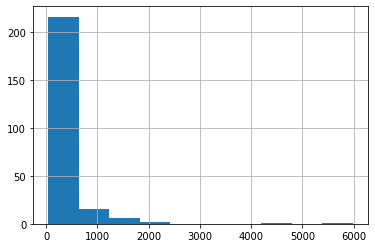

In [32]:
#Visualising the columns to detect outliers
geo_df_grouped.price_hols.hist()

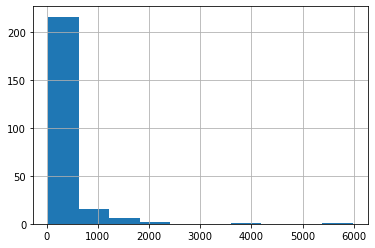

In [33]:
geo_df_grouped.price.hist()

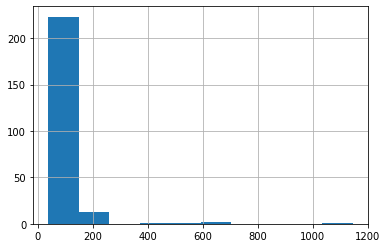

In [34]:
geo_df_grouped.PercentIncrease.hist()

In [35]:
#Making a subset of the data
ind=(geo_df_grouped.price<3000) & (geo_df_grouped.price_hols<3000) & (geo_df_grouped.price_hols<=200)

In [36]:
#subsetting
geo_df_grouped=geo_df_grouped.loc[ind].copy()

In [37]:
#merging geo_df with taxizones shapefile
geo_df_grouped = pd.merge(geo_df_grouped, df, right_on=df["LocationID"], left_on=geo_df_grouped.index, how='inner')

In [38]:
#converting df back to gdp
geo_df_grouped = gpd.GeoDataFrame(geo_df_grouped)

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


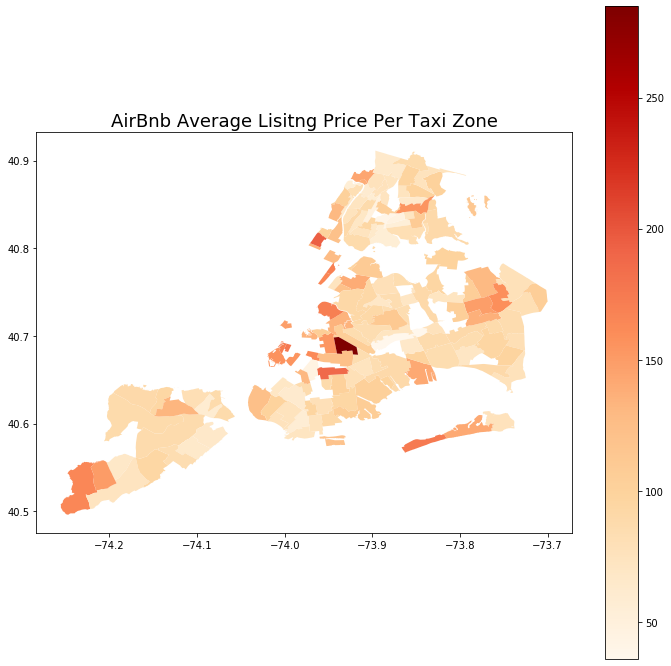

In [39]:
#Visualising average prices per taxi zone throughout the year
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("AirBnb Average Lisitng Price Per Taxi Zone", fontsize=18)
geo_df_grouped.plot(axes=ax, column='price', legend = True, cmap='OrRd')

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


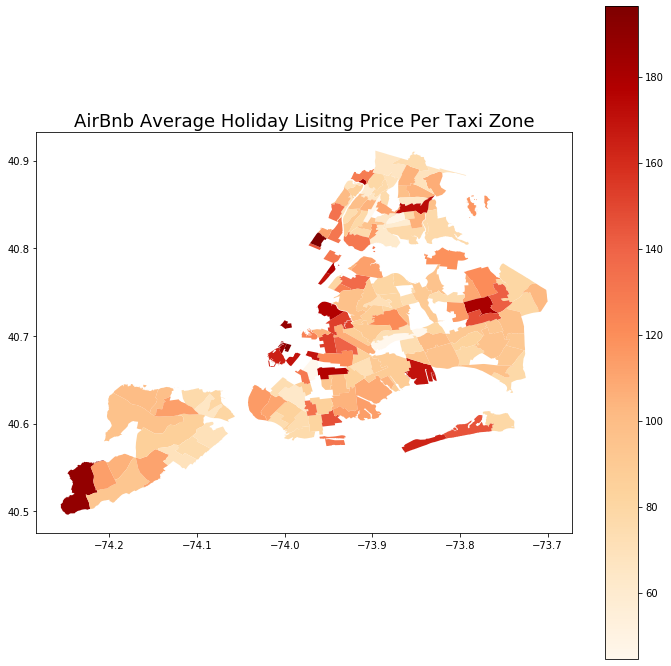

In [40]:
#Visualising average prices per taxi zone only during holidays
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("AirBnb Average Holiday Lisitng Price Per Taxi Zone", fontsize=18)
geo_df_grouped.plot(axes=ax, column='price_hols', legend = True, cmap='OrRd')

/Users/akashyadav/Desktop/nyuclass/ADSUncorrupted/lib/python3.6/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


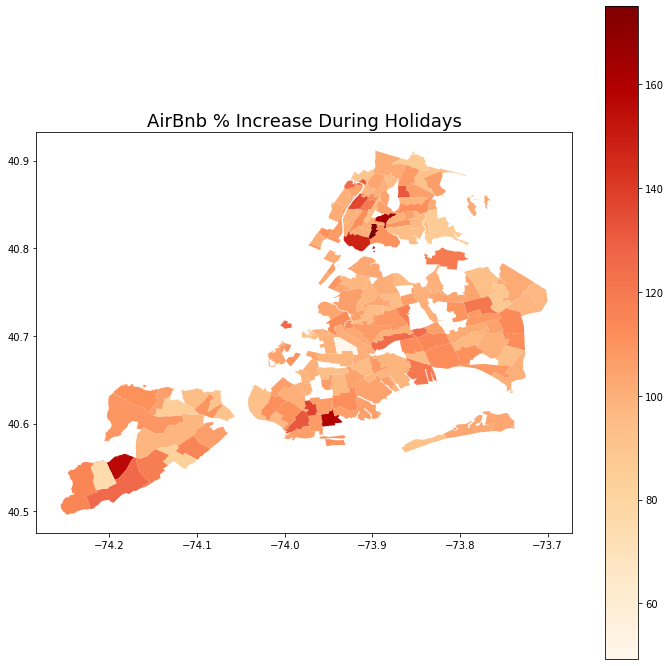

In [41]:
#Visualising % Increase
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("AirBnb % Increase During Holidays", fontsize=18)
geo_df_grouped.plot(axes=ax, column='PercentIncrease', legend = True, cmap='OrRd')